# Import necessary libraries

In [4]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

from sklearn.metrics import auc

import keras

import tensorflow as tf

from keras import backend as K

from keras import metrics

from keras.regularizers import l2

from keras.models import Sequential 

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.metrics import AUC

from keras.optimizers import Adam

from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix


# Set random seed

In [5]:
# Set a seed value

seed_value = 42

# 1. Set 'PYTHONHASHSEED' environment variable at a fixed value

import os 
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set 'python' built-in pseudo-random generator at a fixed value

import random 
random.seed(seed_value)

# 3. Set 'numpy' pseudo-random generator at a fixed value

np.random.seed(seed_value)

# 4. Set 'tensorflow' pseudo-random generator at a fixed value


tf.random.set_seed(seed_value)

# 5.For layers that introduce randomness like dropout, make sure to set seed values 
#model.add(Dropout(0.25, seed=seed_value))

# 6. Configure a new global 'tensorflow' 

# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

# Configure GPUs (if available)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs configured: {len(gpus)}")
    except RuntimeError as e:
        print(f"Error during GPU setup: {e}")
else:
    print("No GPUs found, running on CPU.")

# Verify TensorFlow version and configuration
print(f"TensorFlow Version: {tf.__version__}")


No GPUs found, running on CPU.
TensorFlow Version: 2.18.0


# Generate batches of image data (train, validation, and test) with data augmentation

In [6]:
# set file paths to image files

# project_path = "/D:/Project"
train_path =  "/Project/chest_xray/chest_xray/train"
val_path =  "/Project/chest_xray/chest_xray/val/"
test_path = "/Project/chest_xray/chest_xray/test"


In [7]:
# set up hyperparameters that will be used late

hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 100
hyper_channels = 1
hyper_mode = 'grayscale'

In [8]:
# Generate batches of image data (train, validation, and test) with data augmentation

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale= 1.0/255.0)


train_generator = train_datagen.flow_from_directory(directory = val_path,
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size,
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary',
                                                    seed = 42)

val_generator = val_datagen.flow_from_directory(directory = val_path,
                                                target_size = (hyper_dimension, hyper_dimension),
                                                batch_size = hyper_batch_size,
                                                class_mode = 'binary',
                                                color_mode = hyper_mode,
                                                shuffle = False,
                                                seed = 42)


test_generator = test_datagen.flow_from_directory(directory = test_path,
                                                  target_size = (hyper_dimension, hyper_dimension),
                                                  batch_size = hyper_batch_size,
                                                  class_mode = 'binary',
                                                  color_mode = hyper_mode,
                                                  shuffle = False,
                                                  seed = 42)

test_generator.reset()
                                                    

Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 624 images belonging to 2 classes.


# Train the model

In [9]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))


cnn.add (Flatten())


cnn.add(Dense(activation='relu', units = 128))
cnn.add(Dense(activation='sigmoid', units=1))


cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator,
                             steps_per_epoch = len(train_generator),
                             epochs = 200,
                             validation_data = val_generator,
                             validation_steps = len(val_generator),
                             verbose = 2)



C:\Users\mrahm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\mrahm\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
1/1 - 2s - 2s/step - auc: 0.6328 - loss: 0.6926 - val_auc: 0.6875 - val_loss: 0.6914
Epoch 2/200
1/1 - 0s - 220ms/step - auc: 0.5938 - loss: 0.6930 - val_auc: 0.8047 - val_loss: 0.6908
Epoch 3/200
1/1 - 0s - 218ms/step - auc: 0.7266 - loss: 0.6924 - val_auc: 0.7969 - val_loss: 0.6893
Epoch 4/200
1/1 - 0s - 214ms/step - auc: 0.7344 - loss: 0.6904 - val_auc: 0.8125 - val_loss: 0.6872
Epoch 5/200
1/1 - 0s - 215ms/step - auc: 0.8359 - loss: 0.6883 - val_auc: 0.8359 - val_loss: 0.6845
Epoch 6/200
1/1 - 0s - 213ms/step - auc: 0.7656 - loss: 0.6874 - val_auc: 0.9297 - val_loss: 0.6823
Epoch 7/200
1/1 - 0s - 213ms/step - auc: 0.8516 - loss: 0.6830 - val_auc: 0.9141 - val_loss: 0.6789
Epoch 8/200
1/1 - 0s - 211ms/step - auc: 0.9688 - loss: 0.6808 - val_auc: 0.8438 - val_loss: 0.6752
Epoch 9/200
1/1 - 0s - 205ms/step - auc: 0.7891 - loss: 0.6786 - val_auc: 0.8984 - val_loss: 0.6710
Epoch 10/200
1/1 - 0s - 210ms/step - auc: 0.8828 - loss: 0.6720 - val_auc: 0.9141 - val_loss: 0.6682
Ep

# Create a function that outputs metrics and charts

Metrics: Accuracy, Precision, Recall, Specificity, and F1 Score
Charts:
1) Train VS. Validation Loss
2) Train VS. Validation AUC
3) Confusion Matrix

In [23]:
def create_charts(cnn, cnn_model):
    ##DEFINE##
    ##Define 1: train & validation loss
    
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    # Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    # Define 3: y_pred & y_true
    y_true = test_generator.classes
    Y_pred = cnn.predict(test_generator, steps = len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    y_pred_prob = Y_pred.T[0]
    
    
    # PLOT
    fig = plt.figure(figsize=(13, 10))
    
    
    # PLOT 1: TRAIN VS. VALIDATION LOSS
    plt.subplot(2, 2, 1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    
    # PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2, 2, 2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Numbers of Epochs", size=14)
    plt.legend()
    
    
    # PLOT 3: CONFUSION MATRIX
    plt.subplot(2, 2, 3)
    
    # Set up the labels for in the confusion confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    ticklabels = ['Normal', 'Pneumonia']
    
    # Create confusion_matrix as heatmap
    sns.set_theme(font_scale= 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14)
    
    
    # PLOT 4: ROC CURVE
    plt.subplot(2, 2, 4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    
    
    # END PLOTS
    plt.tight_layout()
    
    # Summary Statistics
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / np.sum(cm)    # % positive out of all predicted positives
    precision = TP / (TP + FP)  # % positive out of all supposed to be positives
    recall = TP / (TN + FP) # % positive out of all supposed to be positives
    specificity = TN / (TN + FP)    # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics] \nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity,f1)
    print(stats_summary)
    

# Output results via metrics and charts

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step
[Summary Statistics] 
Accuracy = 64.58% | Precision = 88.58% | Recall = 82.91% | Specificity = 89.32% | F1 Score = 85.65%


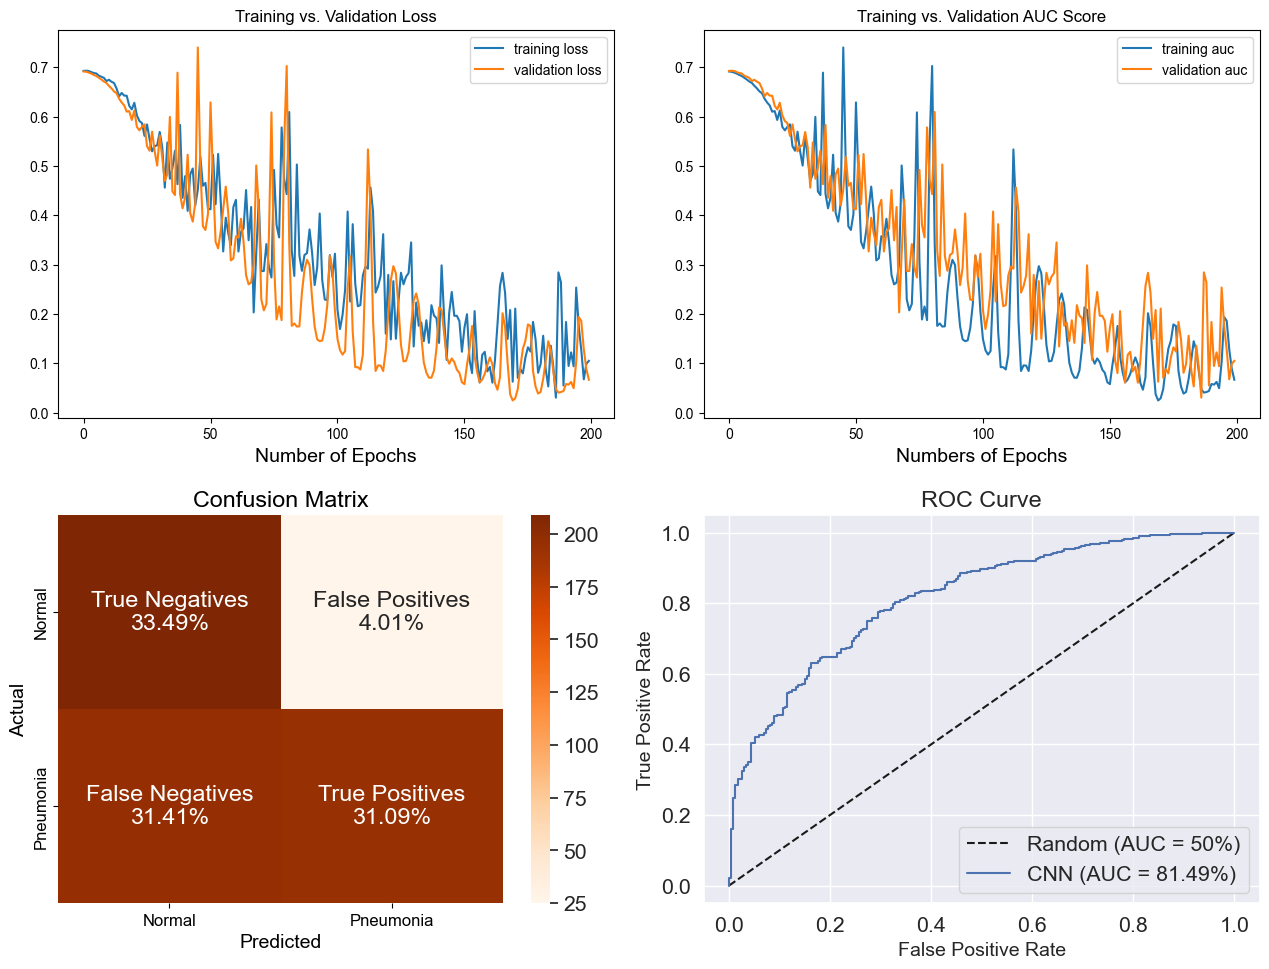

In [24]:
create_charts(cnn, cnn_model)